In [1]:
import numpy as np
import simulation_manager, results_annalysis
import instance_genrerantion

## Création de l'instance

#### Génération d'une instance par réduction

In [2]:
from problem_reductions.npp_to_ising import *
# NPP instance
weights = [1, 2, 3, 4]

# Ising instance
J, H = npp_to_ising(weights=weights)

#### Ou génération d'un instance aléatoire

In [3]:
instance_size = 100
J, H = instance_genrerantion.generate_instance(size=instance_size)

In [4]:
n = 10
J = np.ones(shape=(n, n))
H = np.zeros(shape=n)

## Nouveau: Choix des fonctions `temperature`, `a` et `pas` personalisées

Pour expérimenter plus vite

In [5]:
num_iterations = 500

def pumpuing_rate(self, t):
    return t/num_iterations

def step_func(self, t):
    return 0.01

In [6]:
step_func(1, 41)

0.01

## Simulation avec des paramètres choisis

In [7]:
manager = simulation_manager.SimulationManager(step_size=0.5, num_iterations=num_iterations, num_simulations=80, J=J, H=H, pumping_rate=pumpuing_rate, stopping_criterion=0, save_states_history=False, save_energies_history=False, n_threads=1, savetofile=False)

In [8]:
states, energies, last_states, last_energies = manager.run_simulation()

TypeError: compute_matrix_C() takes 1 positional argument but 2 were given

In [10]:
last_states.shape

(80, 100, 2)

In [11]:
last_states[0]

array([[-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1.,

In [15]:
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

NameError: name 'energies' is not defined

In [18]:
states.shape

(50, 100, 600, 2)

In [22]:
pos = states[:, :, 599, 0]

In [23]:
pos

array([[ 1.03560505,  1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       [-1.03560505,  1.        ,  0.58523451, ..., -1.00494365,
        -1.01939202, -1.03931574],
       [-1.03560505, -1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       ...,
       [ 1.03560505, -1.        ,  0.58523451, ..., -1.00494365,
         1.01939202,  1.03931574],
       [ 1.03560505, -1.        , -0.58523451, ...,  1.00494365,
         1.01939202,  1.03931574],
       [-1.03560505, -1.        ,  0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574]])

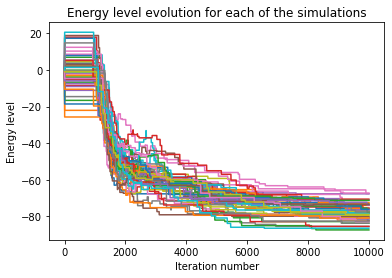

In [28]:
J2 = J * 0.1
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies)

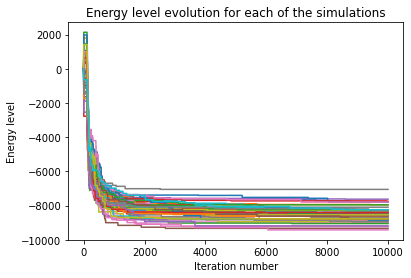

In [37]:
J2 = J * 10
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies[:, :])

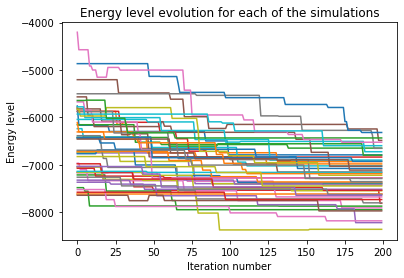

In [42]:
results_annalysis.plot_energies_evolution(energies[:, :])

On a directement accès aux résultats et aussi aux chemin d'accès du fichier contenant l'instance, les paramètres ou les résultats si on veut y avoir accès plus tard

## Interprétation des résultats

#### On peut aller les chercher a partir du filename (si besoin)

(Mais ici on les as direct récupéré en sortie de `compute_single_instance`)

In [10]:
# states, energies = results_annalysis.open_results(path)

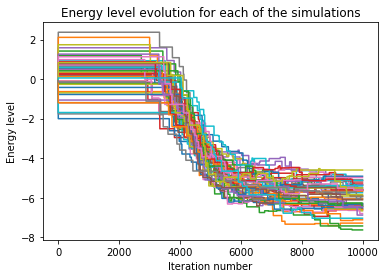

In [25]:
results_annalysis.plot_energies_evolution(energies[:, :])

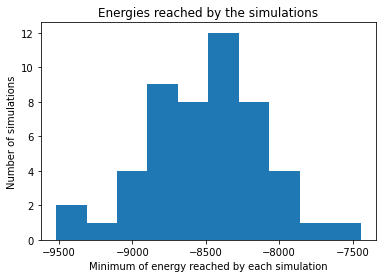

In [30]:
results_annalysis.plot_energies_hist(energies)

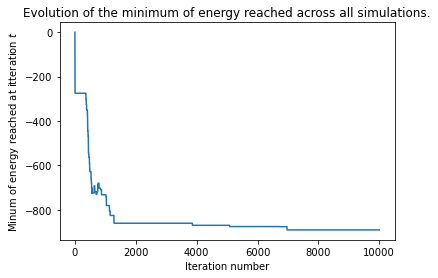

In [13]:
results_annalysis.plot_min_energy_evolution(energies)